<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## 1. Understand K-means

**K-means Algorithm**



1.   Randomly initializing the cluster centroids $\mu_1,\mu_2,...,\mu_k\in\mathbb{R}^n$
2.   Repeats the following steps until convergence:
>$ c^{(i)}=\underset{j}{\textrm{arg min}}||x^{(i)}-\mu_j||^2 \quad $  and,  $\quad\mu_j=\frac{\displaystyle\sum_{i=1}^m1_{\{c^{(i)}=j\}}x^{(i)}}{\displaystyle\sum_{i=1}^m1_{\{c^{(i)}=j\}}}$


>Note:
$c^{(i)}$ is the cluster of data point $i$; $\mu_j$ is the center of cluster $j$



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

We randomly generate some groups of data in 2-d space

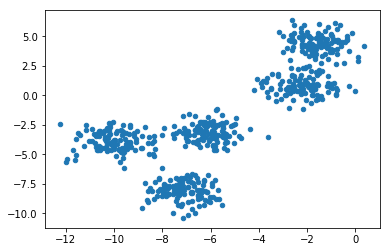

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=20);

Then we run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-6.11398201, -3.11924685],
       [-1.55383662,  4.44779912],
       [-7.12477649, -8.09803975],
       [-9.98787166, -3.88556349],
       [-2.17812827,  0.7903456 ]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

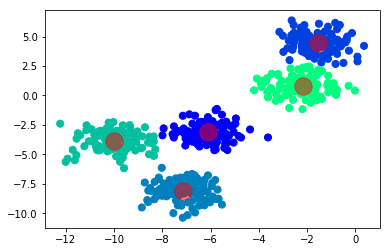

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

## 2. K-means for image compression

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [0]:
from sklearn.datasets import load_sample_image
image = load_sample_image("china.jpg")


In [7]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print( data.shape )
reduced_colors = 16

(273280, 3)


In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(reduced_colors)
kmeans.fit(data)

centers = kmeans.cluster_centers_
reduced_color_image = centers[kmeans.predict(data)]


In [9]:
kmeans.cluster_centers_

array([[0.06889242, 0.06079491, 0.03385268],
       [0.80808824, 0.82642974, 0.84468954],
       [0.38545896, 0.38066979, 0.24917578],
       [0.59184563, 0.60448179, 0.55107376],
       [0.95439837, 0.9667631 , 0.98952105],
       [0.32592593, 0.15050109, 0.11076253],
       [0.52750397, 0.51701113, 0.27101219],
       [0.87144608, 0.91625817, 0.96593137],
       [0.69917441, 0.73467492, 0.73250774],
       [0.84602683, 0.63302374, 0.45820433],
       [0.48035892, 0.47510801, 0.42904619],
       [0.300172  , 0.28888889, 0.19428965],
       [0.17497381, 0.16039515, 0.11956294],
       [0.55408497, 0.32418301, 0.25294118],
       [0.74732448, 0.83602783, 0.93606578],
       [0.7754902 , 0.51127451, 0.31519608]])

In [0]:
def plot_image_vs_reduced(image, reduced_image):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(reduced_image)
    ax[1].set_title('Reduced-color Image', size=16);
    plt.show()

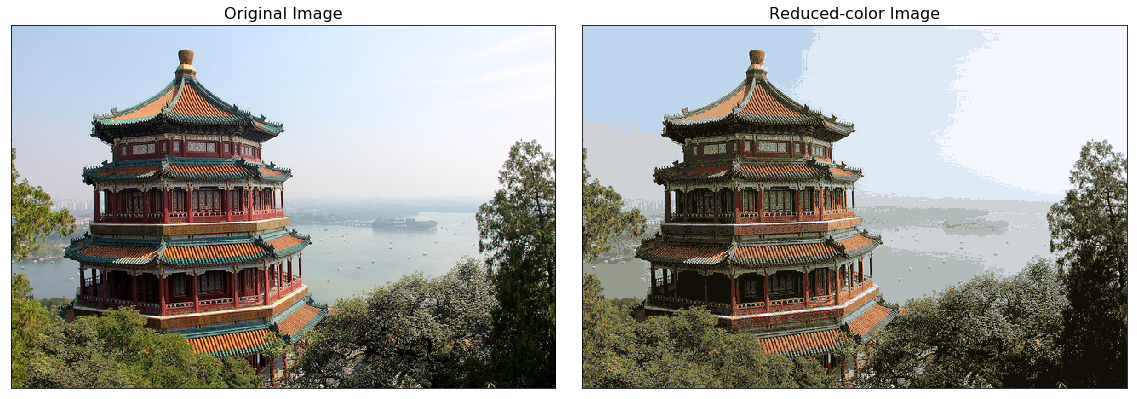

In [11]:
image_recolored = reduced_color_image.reshape(image.shape)
plot_image_vs_reduced( image, image_recolored )

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def plot_colors_in_colorspace( image, reduced_colors ):

    r = []
    g = []
    b = []

    for line in image:
      for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
    fig, ax = plt.subplots(1, figsize=(12, 10))

    ax = Axes3D(fig)
    ax.scatter(r[::16], g[::16], b[::16], cmap='viridis', lw=0, s=20, alpha=0.3, label='origian color')
    ax.scatter(reduced_colors[:, 0], reduced_colors[:, 1], reduced_colors[:, 2], c='r', lw=10, s=300, alpha=0.9, label='reduced color')
    ax.set_xlabel('R color', fontsize=20)
    ax.set_ylabel('G color', fontsize=20)
    ax.set_zlabel('B color', fontsize=20)
    ax.set_title('Original color space: 16,777,216 colors', fontsize=24)
    ax.legend(loc='lower left', fontsize=16)

    plt.show()        

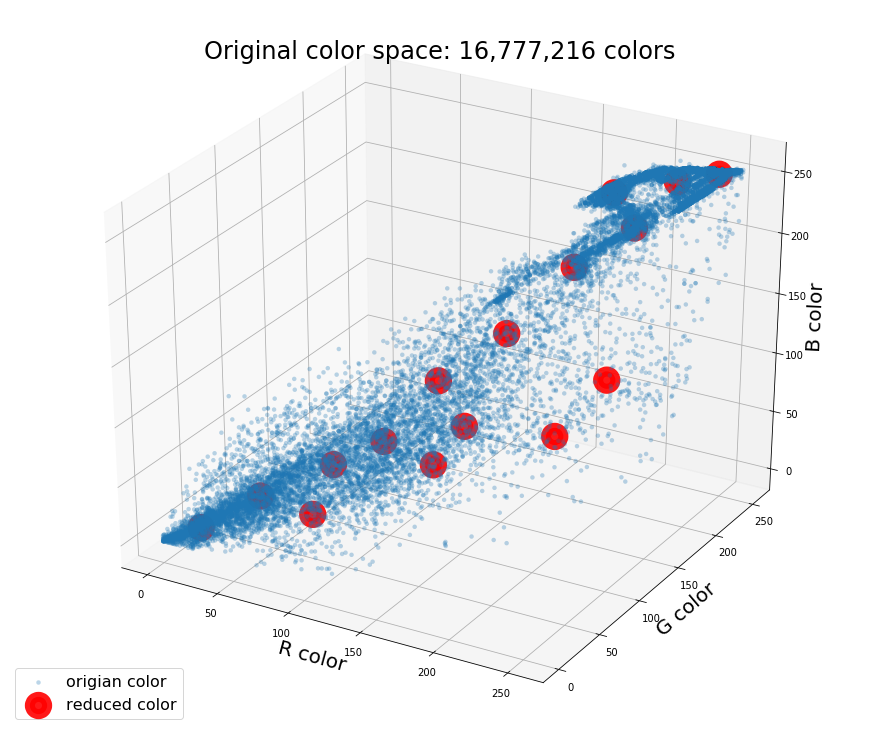

In [13]:
plot_colors_in_colorspace( image = image, reduced_colors = centers * 255 )


## 3. k-means for digits clustering

Here we will use k-means to identify similar digits of MNIST without using the original label .

In [14]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


The small green number at the top-left is the ground truth label of the image.


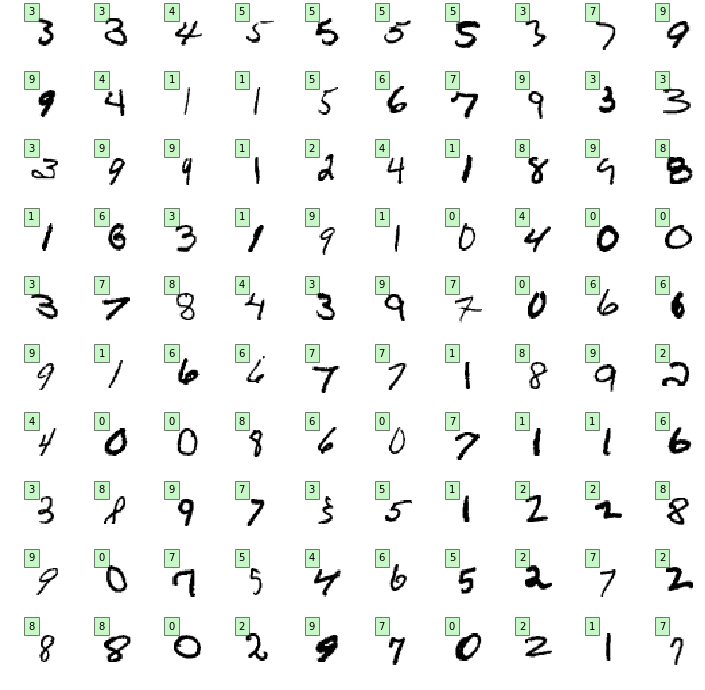

In [15]:
def plot_random_100_images(data, label, prediction = None, label_encoded = False, prediction_provided = False):
  
    print( "The small green number at the top-left is the ground truth label of the image." )
    if prediction_provided == True:
        print( "The small pink number beside it is the predicted value of the image." )
    
    _, axarr = plt.subplots(10,10,figsize=(12,12))
    plt.subplots_adjust(wspace=0.8, hspace=0.8)

    for i in range(10):
        for j in range(10):
           index = np.random.randint(data.shape[0])
           if label_encoded == False:
              groundtruth_lable = str(label.flatten()[index])
              if prediction_provided == True:
                  predicted_lable = str(prediction.flatten()[index])
           else:
              groundtruth_lable = str(np.argmax(label[index]))
              if prediction_provided == True:
                  predicted_lable = str(np.argmax(prediction[index]))
                                        
           axarr[i,j].imshow(data[index].reshape((28,28), order = 'F'), cmap="binary", interpolation="nearest")          
           axarr[i,j].axis('off')  
           axarr[i,j].text(0.5, 0.5, groundtruth_lable,bbox=dict(facecolor='lightgreen', alpha=0.5))
          
           if prediction_provided == True:
              axarr[i,j].text(10.5, 0.5, predicted_lable,bbox=dict(facecolor='pink', alpha=0.5))

              
plot_random_100_images(X_train, y_train )

In [16]:
X = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
y = y_train

#X = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
#y = y_test
print( X.shape)

(60000, 784)


In [0]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X = sc.fit_transform(X)

In [18]:
kmeans = MiniBatchKMeans(10)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y_pred = kmeans.predict(X)

print( "centers:", centers.shape )
print( "y_pred: ", y_pred.shape )

centers: (10, 784)
y_pred:  (60000,)


The result of K-means is 10 clusters in 784 dimensions, which is 28x28. Let's see what these cluster centers look like:

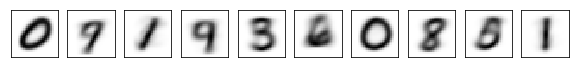

In [19]:
fig, ax = plt.subplots(1, 10, figsize=(10, 2))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [0]:
from scipy.stats import mode

labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acs = accuracy_score(y, labels)
mat = confusion_matrix(y, labels)

print( "Accuracy: ", acs )
print( "Confusion Matrix: \n", mat )

Accuracy:  0.5131833333333333
Confusion Matrix: 
 [[4594   30    0 1156   37    0   83   12   11    0]
 [   0 6707    0   11    4    0    7    9    4    0]
 [  91 1042    0  608  156    0 3401   66  594    0]
 [  28  589    0 4743  159    0   60   41  511    0]
 [  11  509    0    8 3167    0  245 1884   18    0]
 [  66 1065    0 2980  397    0   58  391  464    0]
 [ 122  633    0  489   57    0 4600    1   16    0]
 [  24  674    0    7 1829    0   17 3661   53    0]
 [  51  818    0 1286  164    0   56  157 3319    0]
 [  51  417    0  109 2863    0   29 2448   32    0]]
